# **Netflix Recommendation System Based On SVD Model**

Project: Netflix Recommendation System

Steps we are doing below.

Here on the basis of Previous customer ratings, we recommend the moves to the particular customer

1) In this project we have two datasets
      a) customer rating dataset, where we have ratings of all the customers with respect to customer ID and movie ID.
      b) Movie Title dataset

2) But here the customer churn dataset is not in a proper format.

3) We convert the customer rating dataset into a proper format.

4) When we convert it into proper format after this we apply the benchmark here

5) Here we apply two benchmarks,
                           
    A) Movies which have less no of rating we remove movies

    B) The second Benchmark is that for customers who see less number of movies remove that rating.

6) After this we apply the SVD Model

7) After this we load the movie title dataset and map the customer rating dataset with movie titles on the basis of movie ID

8) After this we predict the movies for the specific customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/NetflixDataset/combined_data_1.txt.zip')
df.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [ ]:
df_new= pd.read_csv('/content/drive/MyDrive/NetflixDataset/combined_data_1.txt.zip',header=None,names=['Cust_id','Raitings'],usecols=[0,1])
df_new.head()

,Cust_id,Raitings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
move_id = df_new.isnull().sum()

In [ ]:
exact_movie_count = move_id['Raitings']
exact_movie_count

4499

In [ ]:
total_unique_customer_included_move_id = df_new['Cust_id'].nunique()
total_unique_customer_included_move_id

475257

In [ ]:
exact_total_customer_id  = total_unique_customer_included_move_id - exact_movie_count
exact_total_customer_id

470758

In [ ]:
# Now we get total no of rating given by the customer

In [ ]:
df_new

,Cust_id,Raitings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
df_new['Raitings'].count()

24053764

In [ ]:
move_id

Cust_id        0
Raitings    4499
dtype: int64

In [ ]:
exact_no_of_ratings = df_new['Cust_id'].count() - move_id['Raitings']
exact_no_of_ratings

24053764

In [ ]:
# now we check how many people rated the to the movies as 1,2,3,4,5 rating to respected movies
# OR in other words you can say how many times people gives rating 1,2,3,4,5

In [ ]:
stars = df_new.groupby('Raitings')['Raitings'].agg(['count'])
stars

,count
Raitings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


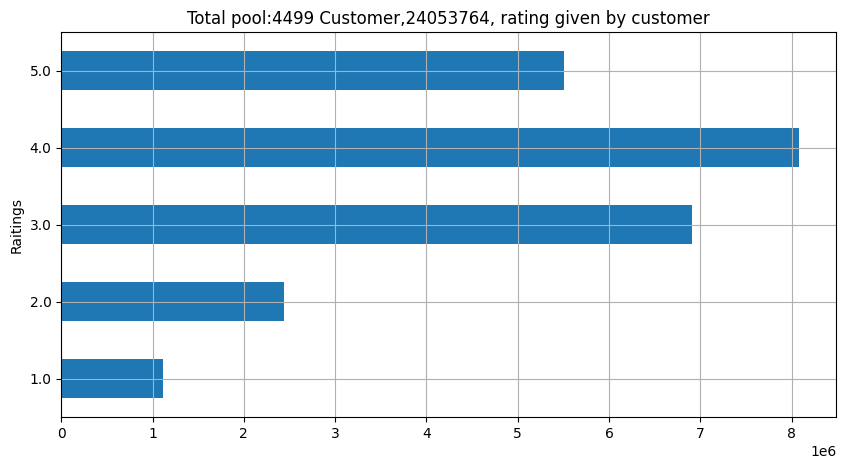

In [ ]:
stars.plot(kind='barh',legend=False,figsize=(10,5))
plt.title(f'Total pool:{exact_movie_count} Customer,{exact_no_of_ratings}, rating given by customer')
plt.grid(True)

In [ ]:
df_nan = pd.DataFrame(pd.isnull(df_new['Raitings']))
df_nan

,Raitings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
# sns.barplot(x=[1,2,3,4,5],y=sns_df.count, data = stars)

In [ ]:
df_nan=df_nan[(df_nan['Raitings'] == True)]
df_nan

,Raitings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan=df_nan.reset_index()
df_nan

,index,Raitings
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
movie_np = []
movie_id = 1
for i ,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp = np.full((1,i-j-1),movie_id)
  movie_np = np.append(movie_np,temp)
  movie_id+=1

last_record = np.full((1,len(df_new) - df_nan.iloc[-1,0]-1),movie_id) # here we fill 1,428 shape of the data with last movie id 4499
movie_np = np.append(movie_np,last_record) # here we append it in original movie_id

In [ ]:
df_nan.iloc[-1,0] -1

24057833

In [ ]:
(1,len(df_new) - df_nan.iloc[-1,0]-1)

(1, 428)

In [ ]:
df_nan['index'][1:] # this is j

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][:-1]  # this is i

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [ ]:
pd.Series(movie_np)

0              1.0
1              1.0
2              1.0
3              1.0
4              1.0
             ...  
24053759    4499.0
24053760    4499.0
24053761    4499.0
24053762    4499.0
24053763    4499.0
Length: 24053764, dtype: float64

In [ ]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])

In [ ]:
y=tuple(x)
y
# here zip give you exact range

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [ ]:
len(y)

4498

In [ ]:
df_new=df_new[pd.notnull(df_new['Raitings'])]
# it gives you DataFrame of all movies id

df_new['Movie Id'] = movie_np.astype(int)
df_new['Cust_id'] = df_new['Cust_id'].astype(int)
print('This is new dataset')
df_new

<ipython-input-32-3eed096a32ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Movie Id'] = movie_np.astype(int)


This is new dataset


<ipython-input-32-3eed096a32ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cust_id'] = df_new['Cust_id'].astype(int)


,Cust_id,Raitings,Movie Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
# Now we apply some filter on the updated df_new
# 1) We remove all these moves which have very less rating or movies have less no of rating we remove that
# 2) we remove that customer rating which see only few movies or customer that have less rating remove that movies

In [ ]:
# Now we check which movies id have how much rating

In [ ]:
data_set_movie_summery = df_new.groupby('Movie Id')['Raitings'].agg(['count'])
data_set_movie_summery
# now user decide that from which movies id we should continue and which should remove
# if you need very advance recomendation then your benchmark should be higher
# if you need simple recomendation system then you can continue low benchmark

,count
Movie Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
# I take 70% of Behchmark
data_set_movie_summery['count'].quantile(0.7)

1798.6

In [ ]:
movies_beanch_mark = round(data_set_movie_summery['count'].quantile(0.7),0)
movies_beanch_mark
# So here we can say movie which have 1799 or more than 1799 rating which is only use for recomandation

1799.0

In [ ]:
# now we creating a list of index which is not passing the BenchMark

In [ ]:
data_set_movie_summery['count'] < movies_beanch_mark

Movie Id
1        True
2        True
3       False
4        True
5        True
        ...  
4495     True
4496    False
4497     True
4498     True
4499     True
Name: count, Length: 4499, dtype: bool

In [ ]:
data_set_movie_summery[data_set_movie_summery['count'] < movies_beanch_mark]
# this is dataframe of all movie id which not qualify the beanchMark

,count
Movie Id,
1,547
2,145
4,142
5,1140
6,1019
...,...
4494,130
4495,614
4497,714


In [ ]:
# now we get index of all df which will not qualify the BeanchMark
drop_movies_id_list = data_set_movie_summery[data_set_movie_summery['count'] < movies_beanch_mark].index
drop_movies_id_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie Id', length=3149)

In [ ]:
len(drop_movies_id_list)

3149

In [ ]:
df_new

,Cust_id,Raitings,Movie Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
# Now we remove in active user movie rating

In [ ]:
data_set_cust_rating = df_new.groupby('Cust_id')['Raitings'].agg(['count'])
data_set_cust_rating
# Here it shows that how much time customer gives the rating
# Here you can also set the BeanchMark

,count
Cust_id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
data_set_cust_rating.quantile(0.7)

count    52.0
Name: 0.7, dtype: float64

In [ ]:
cust_beanch_mark = round(data_set_cust_rating['count'].quantile(0.7),0)
cust_beanch_mark

52.0

In [ ]:
drop_cust_list = data_set_cust_rating[data_set_cust_rating['count']<cust_beanch_mark]
drop_cust_list

,count
Cust_id,
8,21
10,49
25,4
33,11
42,36
...,...
2649384,7
2649401,30
2649404,12


In [ ]:
drop_cust_list_act = drop_cust_list.index
drop_cust_list_act
# these are the customer id which not pass the benchMarck

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_id', length=327300)

In [ ]:
len(drop_cust_list_act)

327300

In [ ]:
# now on the base of above data we apply filter

In [ ]:
df_new['Movie Id'].isin(drop_movies_id_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie Id, Length: 24053764, dtype: bool

In [ ]:
df_new[~df_new['Movie Id'].isin(drop_movies_id_list)]

,Cust_id,Raitings,Movie Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [ ]:
df_new[~df_new['Cust_id'].isin(drop_cust_list_act)]

,Cust_id,Raitings,Movie Id
1,1488844,3.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
...,...,...,...
24058256,1796454,1.0,4499
24058258,2591364,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
df_new=df_new[~df_new['Movie Id'].isin(drop_movies_id_list)]
df_new=df_new[~df_new['Cust_id'].isin(drop_cust_list_act)]

In [ ]:
df_new

,Cust_id,Raitings,Movie Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_new.shape

(17337458, 3)

In [ ]:
movie_titles = pd.read_csv('/content/drive/MyDrive/NetflixDataset/movie_titles.csv',encoding='ISO-8859-1',header=None,usecols=[0,1,2],names=['Movie id','Year','Name'])
movie_titles

,Movie id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
movie_titles.set_index('Movie id',inplace=True)

In [ ]:
movie_titles

,Year,Name
Movie id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
movie_titles.iloc[:4499,:]

,Year,Name
Movie id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [ ]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162985 sha256=2cc7e69759c9374f02855cde1c297df7310f270a47be9c333b5eb3f2d4e90eda
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# here in this code we are building the model
import math
# Here we dealing with Matrix opeartion so here we use math
import seaborn as sns
from surprise import Reader , Dataset,SVD
# Here SVD is a matrix sepearation, Means Data SVD algo divide the data in matrixs
from surprise.model_selection import cross_validate

In [ ]:
# it helps us to read the dataset for svd algo
# Means it convert the data in a format that svd algorithms can read it
reader=Reader()

In [ ]:
# initially we take 100K record only
data=Dataset.load_from_df(df_new[['Cust_id','Raitings','Movie Id']][:100000],reader)

In [ ]:
data

In [ ]:
# now we creare the object of the SVD model
model = SVD()

In [ ]:
cross_validate(model,data,measures=['RMSE','MAE'],cv=4)

{'test_rmse': array([21.06721395, 21.0061335 , 21.08109599, 21.069721  ]),
 'test_mae': array([19.77524257, 19.67319979, 19.78464863, 19.76358591]),
 'fit_time': (1.7517075538635254,
  1.9456181526184082,
  2.584707736968994,
  1.8049445152282715),
 'test_time': (0.14753007888793945,
  0.22614455223083496,
  0.14488935470581055,
  0.13596272468566895)}

In [ ]:
df_new.head()

,Cust_id,Raitings,Movie Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# so within top five data we take any customer and tryo test recommandation system

In [ ]:
df_custId_1331154= df_new[(df_new['Cust_id'] == 1331154) & (df_new['Raitings'] == 5)]
df_custId_1331154
# so it gives all dataset where this particular user gives rating 5 to the movies

,Cust_id,Raitings,Movie Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [ ]:
# now we map df_custId_1331154 data with movie_titles

In [ ]:
movie_titles

,Year,Name
Movie id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
# Now we buid the recommendation system
# for this i make the copy of the movie_title data because we need to preform some changes of that movie_title data
# we can not apply change on the original data

In [ ]:
user_1331154 = movie_titles.copy()
user_1331154

,Year,Name
Movie id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
# now we reset the its index
user_1331154.reset_index()

,Movie id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# now here we apply beanch mark of movie how have not much movies

In [ ]:
drop_movies_id_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie Id', length=3149)

In [ ]:
drop_cust_list_act

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_id', length=327300)

In [ ]:
user_1331154 = user_1331154.reset_index()

In [ ]:
user_1331154

,Movie id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154['Movie id']

0            1
1            2
2            3
3            4
4            5
         ...  
17765    17766
17766    17767
17767    17768
17768    17769
17769    17770
Name: Movie id, Length: 17770, dtype: int64

In [ ]:
# fro drop_movies_id_list
user_1331154=user_1331154[~user_1331154['Movie id'].isin(drop_movies_id_list)]
user_1331154

,Movie id,Year,Name,estimated_score
2,3,1997.0,Character,5
7,8,2004.0,What the #$*! Do We Know!?,5
15,16,1996.0,Screamers,5
16,17,2005.0,7 Seconds,5
17,18,1994.0,Immortal Beloved,5
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,5
17766,17767,2004.0,Fidel Castro: American Experience,5
17767,17768,2000.0,Epoch,5
17768,17769,2003.0,The Company,5


In [ ]:
user_1331154['estimated_score'] =user_1331154['Movie id'].apply(lambda x: model.predict(1331154,x).est)

In [ ]:
user_1331154
# here we get one more column called as estimation score

,Movie id,Year,Name,estimated_score
2,3,1997.0,Character,5
7,8,2004.0,What the #$*! Do We Know!?,5
15,16,1996.0,Screamers,5
16,17,2005.0,7 Seconds,5
17,18,1994.0,Immortal Beloved,5
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,5
17766,17767,2004.0,Fidel Castro: American Experience,5
17767,17768,2000.0,Epoch,5
17768,17769,2003.0,The Company,5


In [ ]:
|# predict = lambda x: model.predict(1331154,x)
# predict

In [ ]:
# predict_est = lambda x: model.predict(1331154,x).est
# predict_est

In [ ]:
user_1331154=user_1331154.sort_values('estimated_score', ascending = False)

In [ ]:
user_1331154
# So here it is the final output , for the customer which customer id is 1331154 this you can recommondad the
# those movies

,Movie id,Year,Name,estimated_score
2,3,1997.0,Character,5
12888,12889,1975.0,Race with the Devil,5
12890,12891,2003.0,24: Season 3,5
12891,12892,1995.0,Smoke,5
12892,12893,2004.0,Driving Miss Wealthy,5
...,...,...,...,...
8026,8027,1980.0,Gloria,5
8027,8028,1993.0,White Lotus Cult,5
8028,8029,2004.0,Dora the Explorer: Catch the Stars,5
8029,8030,2004.0,Denied,5


In [ ]:
# Also we can check with other customer id

In [ ]:
df_new.head()

,Cust_id,Raitings,Movie Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
# Now we are ckeacking with customer id 2632461

In [ ]:
df_custId_2632461= df_new[(df_new['Cust_id'] == 2632461) & (df_new['Raitings'] == 5)]
df_custId_2632461
# so it gives all dataset where this particular user gives rating 5 to the movies

,Cust_id,Raitings,Movie Id
4147041,2632461,5.0,798
5646443,2632461,5.0,1144
5982055,2632461,5.0,1180
18711849,2632461,5.0,3605


In [ ]:
user_2632461 = movie_titles.copy()
user_2632461

,Year,Name
Movie id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_2632461=user_2632461.reset_index()
user_2632461

,Movie id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# fro drop_movies_id_list df_custId_2632461
user_2632461=user_2632461[~user_2632461['Movie id'].isin(drop_movies_id_list)]
user_2632461

,Movie id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_2632461['estimated_score'] =user_2632461['Movie id'].apply(lambda x: model.predict(2632461,x).est)

<ipython-input-161-dfd1902a3c92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_2632461['estimated_score'] =user_2632461['Movie id'].apply(lambda x: model.predict(2632461,x).est)


In [ ]:
user_2632461

,Movie id,Year,Name,estimated_score
2,3,1997.0,Character,5
7,8,2004.0,What the #$*! Do We Know!?,5
15,16,1996.0,Screamers,5
16,17,2005.0,7 Seconds,5
17,18,1994.0,Immortal Beloved,5
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,5
17766,17767,2004.0,Fidel Castro: American Experience,5
17767,17768,2000.0,Epoch,5
17768,17769,2003.0,The Company,5
